In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

gtd = pd.read_csv('Resource/globalterrorism.csv', encoding='ISO-8859-1')
gtd.head()

C:\Users\Layla Jeon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Who is the most common target(institution) to these attacks?

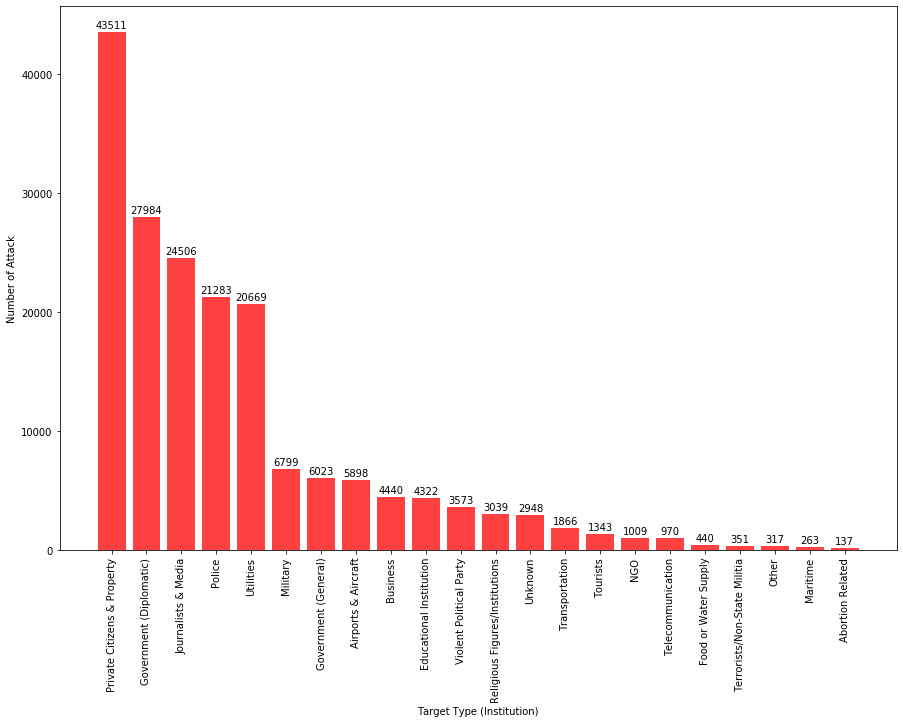

In [7]:
Target = gtd["targtype1_txt"].unique()
Targetcount = gtd["targtype1_txt"].value_counts()

plt.figure(figsize=(15,10))

plt.bar(Target, Targetcount, facecolor="red", alpha=0.75, align="center")

plt.xticks(rotation=90)

for x,y in zip(Target, Targetcount):

    label = "{:.0f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,4),
                 ha='center')

plt.xlabel("Target Type (Institution)")
plt.ylabel("Number of Attack")
plt.show()

# Which group is behind the majority of these attacks?
# - Trend over the years?

C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
C:\Users\Layla Jeon\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Second argument 'y4' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


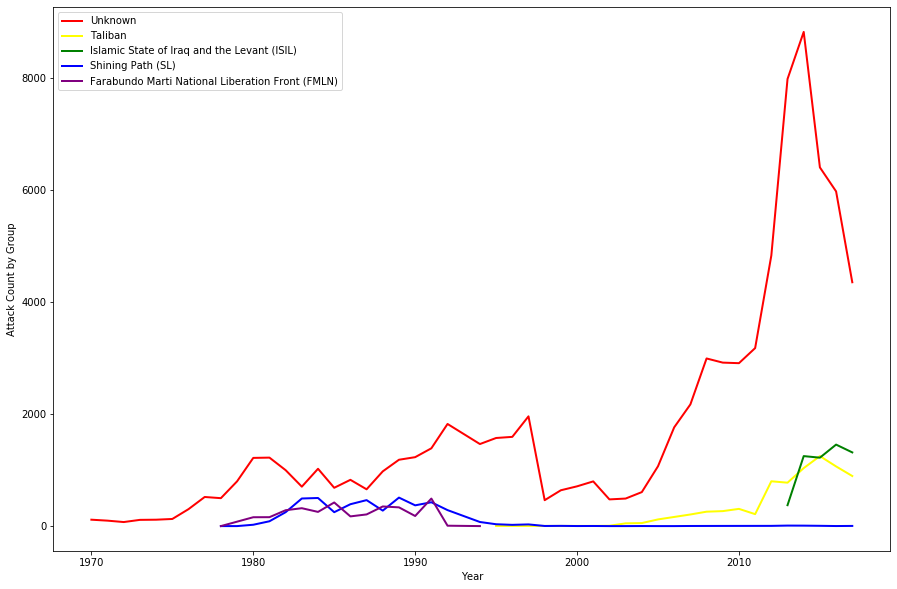

In [11]:
Groupbehind = pd.DataFrame(gtd, columns = ["eventid", "gname", "iyear"])
GroupbehindCount = Groupbehind.groupby(['gname']).count()
GroupbehindCount = Groupbehind.reset_index()
GroupbehindCount = Groupbehind.sort_values(by='eventid', ascending=False)
GroupbehindCount.head(5)

Top5Group = Groupbehind[Groupbehind["gname"].isin(['Unknown','Taliban','Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)','Farabundo Marti National Liberation Front (FMLN)'])]
Top5Group = Top5Group.groupby(['gname', 'iyear']).count()
Top5Group = Top5Group.reset_index()
Top5Group

Unknown = Top5Group[Top5Group['gname'].isin(['Unknown'])]
Taliban = Top5Group[Top5Group['gname'].isin(['Taliban'])]
ISIL = Top5Group[Top5Group['gname'].isin(['Islamic State of Iraq and the Levant (ISIL)'])]
SL = Top5Group[Top5Group['gname'].isin(['Shining Path (SL)'])]
FMLN = Top5Group[Top5Group['gname'].isin(['Farabundo Marti National Liberation Front (FMLN)'])]

plt.figure(figsize=(15,10))

df=pd.DataFrame({'x': Top5Group["iyear"], 'y1': Unknown["eventid"], 'y2': Taliban["eventid"], 'y3': ISIL["eventid"], 'y4': SL["eventid"], 'y5': FMLN["eventid"] })
plt.plot( 'x', 'y1', data=df, color='red', linewidth=2, label="Unknown")
plt.plot( 'x', 'y2', data=df, color='yellow', linewidth=2, label="Taliban")
plt.plot( 'x', 'y3', data=df, color='green', linewidth=2, label="Islamic State of Iraq and the Levant (ISIL)")
plt.plot( 'x', 'y4', data=df, color='blue', linewidth=2, label="Shining Path (SL)")
plt.plot( 'x', 'y5', data=df, color='purple', linewidth=2, label="Farabundo Marti National Liberation Front (FMLN)")

plt.xlabel("Year")
plt.ylabel("Attack Count by Group")

plt.legend()

# Success Rate by Target of Terror

In [48]:
Target_attack_count = pd.DataFrame(gtd, columns = ["eventid","targtype1_txt"])
Target_attack_count = Target_attack_count.groupby(["targtype1_txt"]).count()

Target_attack_success = pd.DataFrame(gtd, columns = ["success","targtype1_txt"])
Target_attack_success = Target_attack_success.loc[lambda Target_attack_success: Target_attack_success['success'] == 1]
Target_attack_success = Target_attack_success.groupby(["targtype1_txt"]).count()

SuccessRate = pd.merge(Target_attack_count, Target_attack_success, on=('targtype1_txt'), how='left')
SuccessRate['Success Percentage'] = round(SuccessRate['success']/SuccessRate['eventid']*100, 2)
SuccessRate.style.format({'Success Percentage':"{:.2f}%"})
SuccessRate = SuccessRate.reset_index()
SuccessRate = SuccessRate.rename(columns={"targtype1_txt": "Target Type", "eventid": "Attack Count", "success": "Success Count"})
SuccessRate = SuccessRate.sort_values("Success Percentage", ascending=False)


SuccessRate.head()


#Cannot display Success Rate

,Target Type,Attack Count,Success Count,Success Percentage
20,Utilities,6023,5703,94.69
10,NGO,970,912,94.02
15,Telecommunication,1009,948,93.95
13,Private Citizens & Property,43511,40658,93.44
2,Business,20669,19245,93.11


# Trend of the U.S fatalities vs International fatalities

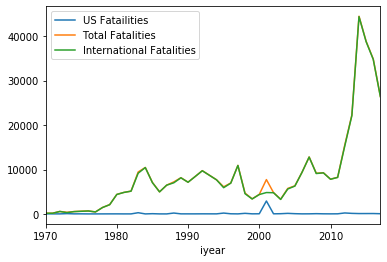

In [180]:
#US fatalities vs international fatalities - line plot for this
Fatalities = pd.DataFrame(gtd, columns = ["iyear", "nkillus", "nkill"])

Fatalities_Sum = Fatalities.groupby(["iyear"]).sum()
Fatalities_Sum["International Fatalities"] = Fatalities_Sum['nkill'] - Fatalities_Sum['nkillus']
Fatalities_Sum = Fatalities_Sum.rename(columns={"iyear": "Year", "nkillus": "US Fatailities", "nkill": "Total Fatalities"})
Fatalities_Sum.plot.line()

#US FATAL 2001year - 2915.0 (9.11)